In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew 
%matplotlib inline

color = sns.color_palette()
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 

In [2]:
datafile = pd.read_csv('E://DataMining/FRvideos.csv')
datafile.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...
5,teXaL6GdQRk,17.14.11,STRANGER JOKES : Jokes de Papa avec les teens ...,"Le Jeu, C'est Sérieux",23,2017-11-13T15:48:57.000Z,"Stranger Jokes""|""Jokes de Papa""|""Stranger Thin...",141253,14354,202,417,https://i.ytimg.com/vi/teXaL6GdQRk/default.jpg,False,False,False,Contenu commandité par Netflix France.\nInspir...
6,nduL7G_gJoY,17.14.11,De retour dans le Manoir hanté avec le Grand J...,silent jill,24,2017-11-12T19:00:08.000Z,"fantome""|""esprits""|""spiritisme""|""hanté""|""ouija...",187654,9286,1381,2419,https://i.ytimg.com/vi/nduL7G_gJoY/default.jpg,False,False,False,"Bonsoir à tous, \nJe tenais beaucoup à retourn..."
7,QmpWE_SODZA,17.14.11,"T'es qui toi ? Squeezie, le youtubeur aux 4 mi...",Salut les terriens !,24,2017-11-13T17:30:01.000Z,"salut les terriens""|""squeezie""|""jeux videos""|""...",91051,1674,1903,701,https://i.ytimg.com/vi/QmpWE_SODZA/default.jpg,False,False,False,"Dans Salut Les Terriens, Thierry Ardisson, reç..."
8,GBVxEpQr8R8,17.14.11,ON VOUS DÉVOILE NOTRE VRAI SALAIRE,Mcfly & Carlito,24,2017-11-12T08:59:25.000Z,"mcfly""|""carlito""|""golden moustache""|""fatshow""|...",2340941,200598,6018,7575,https://i.ytimg.com/vi/GBVxEpQr8R8/default.jpg,False,False,False,Nouvelle vidéo tous les dimanches matins 10h. ...
9,0RFhWyM6qbA,17.14.11,Benzema balance ses dur vérités Deschamps et L...,HALIRIPA,22,2017-11-12T20:16:45.000Z,"Karim benzema football""|""Benzema vs cristiano ...",635236,5945,722,1483,https://i.ytimg.com/vi/0RFhWyM6qbA/default.jpg,False,False,False,Abonnez-vous et partagez au max la famille


In [3]:
datafile.drop(datafile.columns[0], axis=1, inplace=True)
datafile

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...
5,17.14.11,STRANGER JOKES : Jokes de Papa avec les teens ...,"Le Jeu, C'est Sérieux",23,2017-11-13T15:48:57.000Z,"Stranger Jokes""|""Jokes de Papa""|""Stranger Thin...",141253,14354,202,417,https://i.ytimg.com/vi/teXaL6GdQRk/default.jpg,False,False,False,Contenu commandité par Netflix France.\nInspir...
6,17.14.11,De retour dans le Manoir hanté avec le Grand J...,silent jill,24,2017-11-12T19:00:08.000Z,"fantome""|""esprits""|""spiritisme""|""hanté""|""ouija...",187654,9286,1381,2419,https://i.ytimg.com/vi/nduL7G_gJoY/default.jpg,False,False,False,"Bonsoir à tous, \nJe tenais beaucoup à retourn..."
7,17.14.11,"T'es qui toi ? Squeezie, le youtubeur aux 4 mi...",Salut les terriens !,24,2017-11-13T17:30:01.000Z,"salut les terriens""|""squeezie""|""jeux videos""|""...",91051,1674,1903,701,https://i.ytimg.com/vi/QmpWE_SODZA/default.jpg,False,False,False,"Dans Salut Les Terriens, Thierry Ardisson, reç..."
8,17.14.11,ON VOUS DÉVOILE NOTRE VRAI SALAIRE,Mcfly & Carlito,24,2017-11-12T08:59:25.000Z,"mcfly""|""carlito""|""golden moustache""|""fatshow""|...",2340941,200598,6018,7575,https://i.ytimg.com/vi/GBVxEpQr8R8/default.jpg,False,False,False,Nouvelle vidéo tous les dimanches matins 10h. ...
9,17.14.11,Benzema balance ses dur vérités Deschamps et L...,HALIRIPA,22,2017-11-12T20:16:45.000Z,"Karim benzema football""|""Benzema vs cristiano ...",635236,5945,722,1483,https://i.ytimg.com/vi/0RFhWyM6qbA/default.jpg,False,False,False,Abonnez-vous et partagez au max la famille


# 数据摘要
### 对标称属性

In [3]:
# 对标称属性，给出不同变量的不同取值的频数
columns = ['trending_date', 'channel_title', 'category_id', 'publish_time', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
for column in columns:
    print(datafile[column].value_counts())
    print('-' * 66)

18.24.04    200
18.21.01    200
17.16.12    200
18.12.05    200
18.14.04    200
17.02.12    200
18.13.05    200
17.05.12    200
18.28.01    200
17.25.11    200
17.03.12    200
17.14.12    200
18.10.05    200
18.03.05    200
18.08.06    200
17.12.12    200
17.16.11    200
17.29.12    200
18.08.03    200
17.15.12    200
18.22.04    200
18.18.04    200
17.07.12    200
18.21.03    200
18.06.05    200
18.26.05    200
18.25.03    200
18.26.01    200
18.24.05    200
17.24.11    200
           ... 
18.22.03    198
18.06.02    198
18.18.02    198
18.07.04    197
18.05.02    197
18.15.03    197
18.14.05    197
18.26.03    197
18.19.05    197
18.12.02    197
18.13.02    197
18.21.05    197
18.15.02    196
18.27.03    196
18.23.03    196
18.13.03    196
18.16.05    196
18.01.03    196
18.11.02    196
18.14.03    195
18.25.04    195
18.14.02    195
18.16.02    195
18.24.02    195
18.23.05    193
18.06.06    190
18.13.06    188
18.20.05    175
18.17.05    168
18.10.06    168
Name: trending_date, Len

### 数值属性

In [4]:
# 数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数
datafile.describe()

,category_id,views,likes,dislikes,comment_count
count,40724.000,40724.000,40724.000,40724.000,40724.000
mean,20.124,419921.851,17388.864,814.962,1832.453
std,6.984,1772129.644,87205.088,11392.194,14043.213
min,1.000,223.000,0.000,0.000,0.000
25%,17.000,16974.500,338.000,18.000,56.000
50%,23.000,73721.000,1892.500,83.000,235.000
75%,24.000,270808.750,7969.500,335.000,841.000
max,44.000,100911567.000,4750254.000,1353661.000,1040912.000


从上表可以看出views浏览量最大值是100911567.000，最小值是223.000，均值是419921.851，中位数是73721.000，四分位数分别是338.000、1892.500、7969.500
likes观众喜欢的数量最大值是4750254.000，最小值是0.000，均值是17388.864，中位数是1892.500，四分位数分别是338.000、1892.500、7969.500
dislikes观众不喜欢的数量最大值是1353661.000，最小值是0.000，均值是11392.194，中位数是83.000，四分位数分别是18.000、83.000、335.000
comment_count评论数量最大值是1040912.000，最小值是0.000，均值是1832.453，中位数是235.000，四分位数分别是56.000、235.000、841.000

### 缺失值个数

In [6]:
# 计算缺失值的个数
datafile.isnull()[['trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']].sum()

trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2912
dtype: int64

从上述统计可以看出，此数据集只有description缺失数量在2912。

# 数据可视化
### 直方图绘制

views、likes、dislikes和comment_count都是离散值，在此为每一个取值都加上一个服从正态分布的随机数。从而进行是否服从正态分布验证。

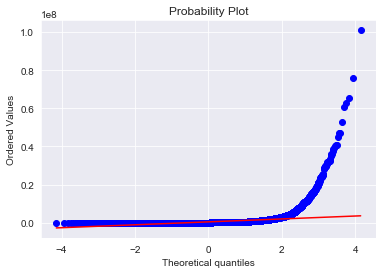

In [7]:
raw_visit_count = datafile['views'].dropna()
raw_visit_count = raw_visit_count.apply(lambda x: x + np.random.normal())

fig = plt.figure()
res = stats.probplot(raw_visit_count, plot=plt)
plt.show()

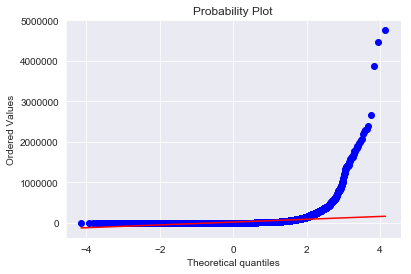

In [8]:
raw_visit_count = datafile['likes'].dropna()
raw_visit_count = raw_visit_count.apply(lambda x: x + np.random.normal())

fig = plt.figure()
res = stats.probplot(raw_visit_count, plot=plt)
plt.show()

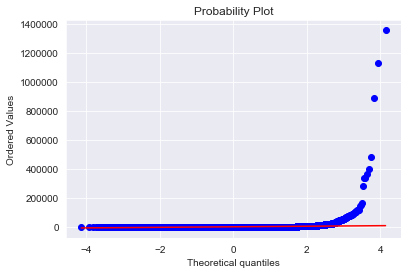

In [9]:
raw_visit_count = datafile['dislikes'].dropna()
raw_visit_count = raw_visit_count.apply(lambda x: x + np.random.normal())

fig = plt.figure()
res = stats.probplot(raw_visit_count, plot=plt)
plt.show()

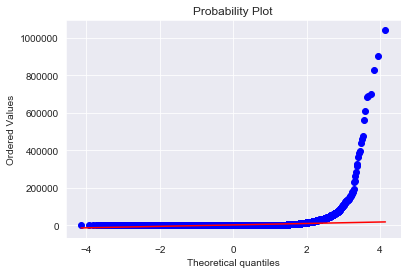

In [10]:
raw_visit_count = datafile['comment_count'].dropna()
raw_visit_count = raw_visit_count.apply(lambda x: x + np.random.normal())

fig = plt.figure()
res = stats.probplot(raw_visit_count, plot=plt)
plt.show()

从QQ图中可以看出，views、likes、dislikes和comment_count这四个数值都不是正态分布。

### 盒图制作 

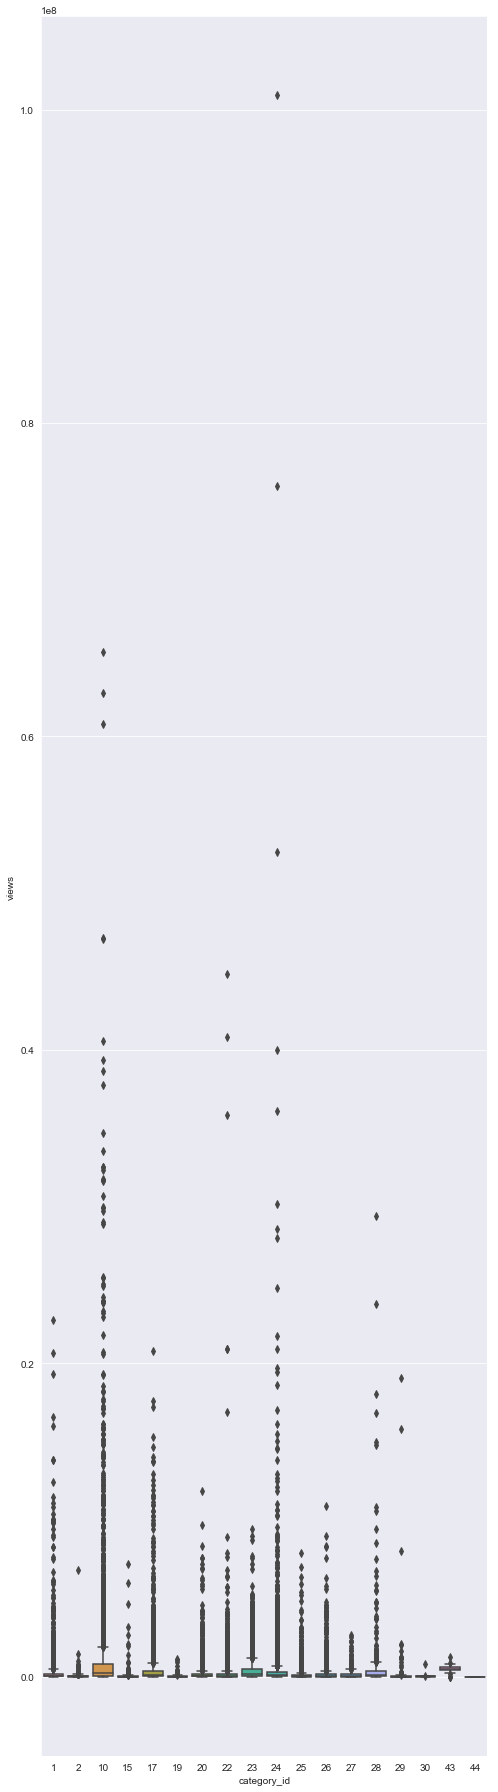

In [17]:
var = 'category_id'
data = pd.concat([datafile['views'], datafile[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 32))
fig = sns.boxplot(x=var, y="views", data=data)

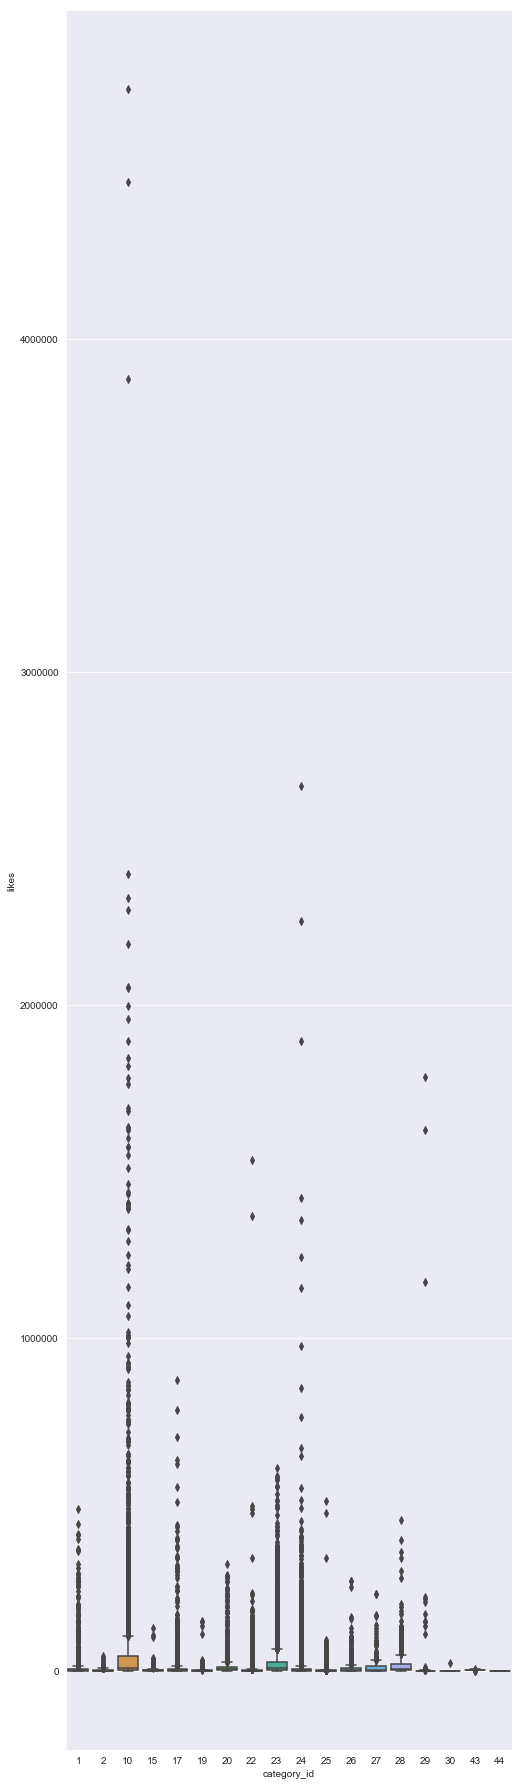

In [18]:
var = 'category_id'
data = pd.concat([datafile['likes'], datafile[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 32))
fig = sns.boxplot(x=var, y="likes", data=data)

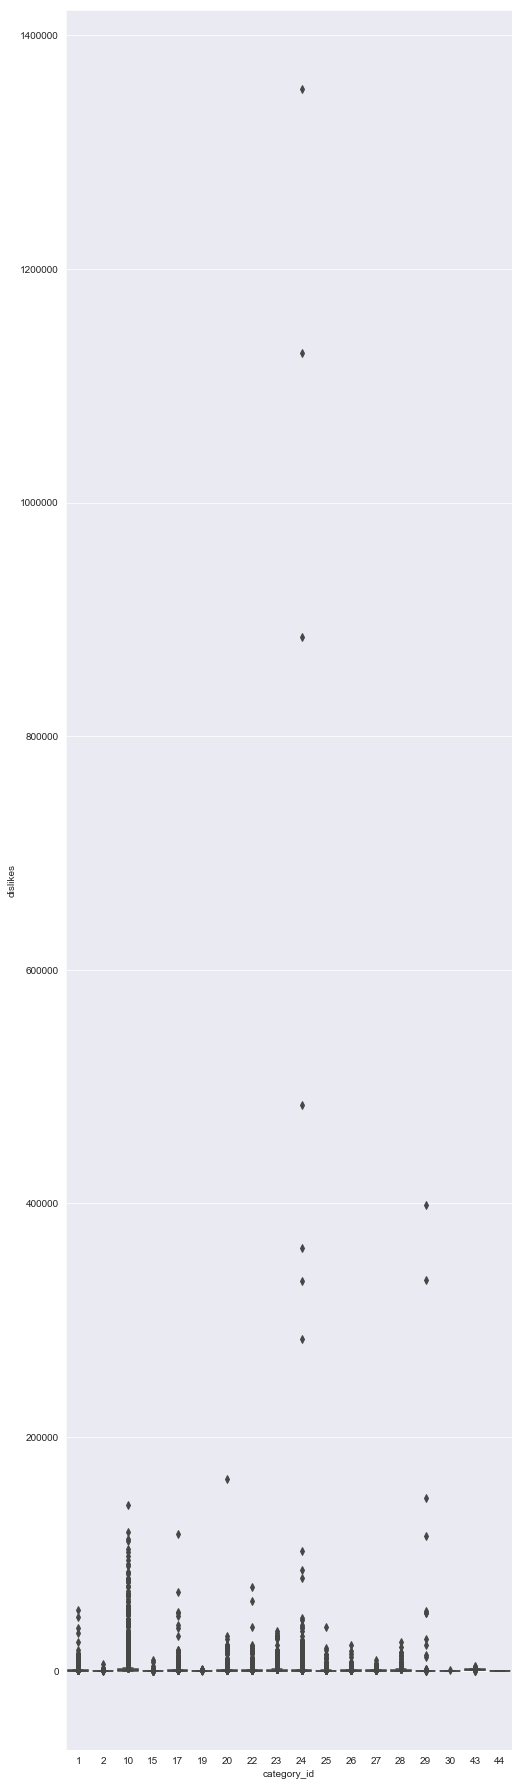

In [19]:
var = 'category_id'
data = pd.concat([datafile['dislikes'], datafile[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 32))
fig = sns.boxplot(x=var, y="dislikes", data=data)

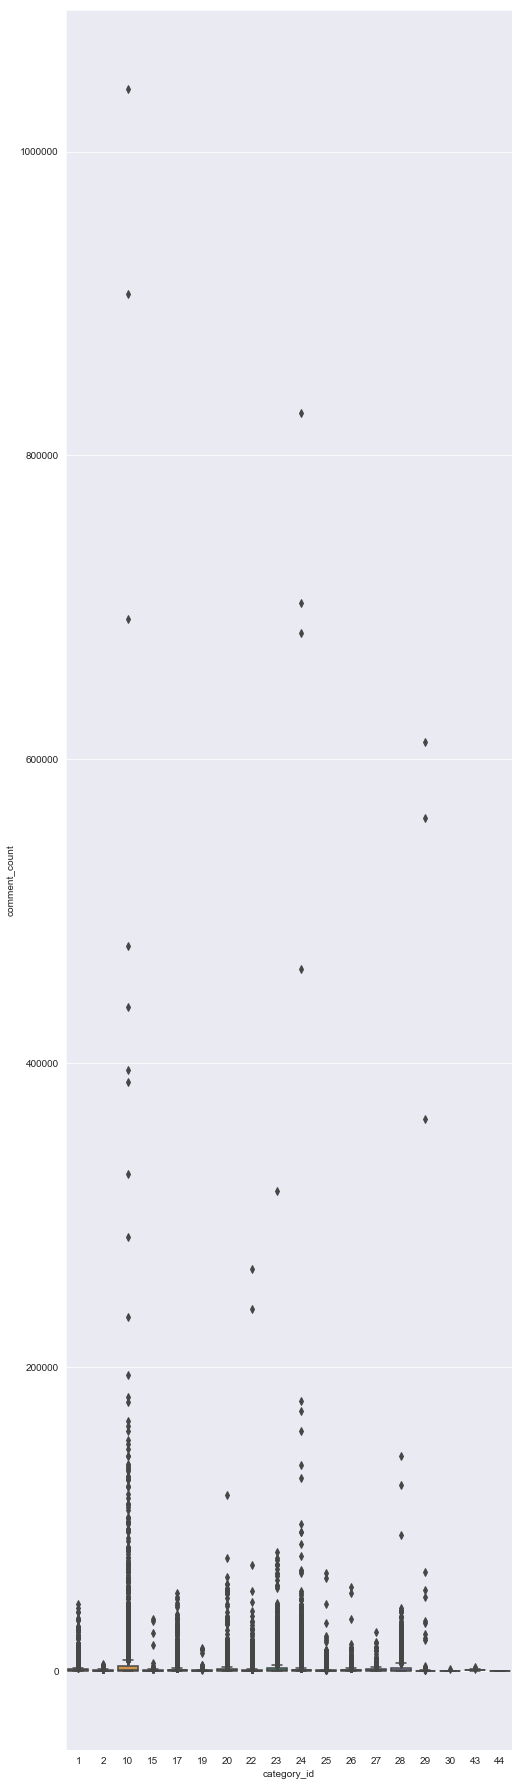

In [20]:
var = 'category_id'
data = pd.concat([datafile['comment_count'], datafile[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 32))
fig = sns.boxplot(x=var, y="comment_count", data=data)

从上述四个盒图来看，views、likes、dislikes和comment_count这四个数据的离散度都比较高。

# 数据缺失处理

In [11]:
all_data_na = (datafile.isnull().sum() / len(datafile)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio
description,7.151


Text(0.5, 1.0, 'Percent missing data of feature')

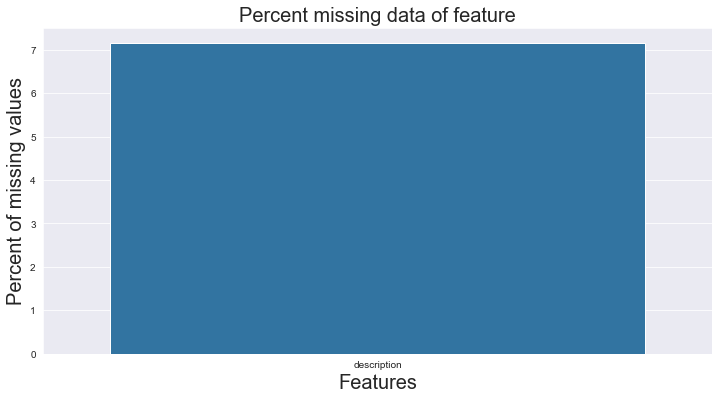

In [12]:
fig = plt.figure(figsize=(12, 6))
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data of feature', fontsize=20)

从上表可以看出，此数据集只有description这个数值缺失概率为7.151%

In [13]:
datafile[datafile['description'].isnull()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
63,SoDxxEyxE84,17.14.11,Raquel Garrido explique son départ de FI - Les...,Gaetano Gitano,22,2017-11-12T21:30:42.000Z,[none],12740,110,16,69,https://i.ytimg.com/vi/SoDxxEyxE84/default.jpg,False,False,False,NaN
75,tlSLFSw_lYs,17.14.11,Kabila pousse Tshibala vers la porte de sortie...,lokoleelela,25,2017-11-13T08:35:59.000Z,[none],26260,182,44,156,https://i.ytimg.com/vi/tlSLFSw_lYs/default.jpg,False,False,False,NaN
94,rfZuiD2MaUM,17.14.11,Karl Lagerfeld descend Merkel dans Salut les T...,SQO,22,2017-11-11T19:09:59.000Z,[none],23722,88,25,60,https://i.ytimg.com/vi/rfZuiD2MaUM/default.jpg,False,False,False,NaN
104,RcFT1BlWYSY,17.14.11,اعلامية قطرية ثتحدت عن المبلغ الذي ستمنحه الفي...,الكرة العالمية TV,22,2017-11-13T12:50:43.000Z,"المغرب""|""المنتخب المغربي""|""المبلغ الذي ستمنحه ...",108303,599,87,83,https://i.ytimg.com/vi/RcFT1BlWYSY/default.jpg,False,False,False,NaN
109,rJiyAQPrTVc,17.14.11,شاهد فرحة محليلي قناة BEIN SPORT فرحة كبيرة لم...,OZ TV,28,2017-11-11T19:57:53.000Z,[none],848688,2736,523,433,https://i.ytimg.com/vi/rJiyAQPrTVc/default.jpg,False,False,False,NaN
114,jVH6-eQwGjE,17.14.11,REPLAY de la DEMI FINALE 1 de l'Afrique a Un I...,L'Afrique a un incroyable talent,24,2017-11-12T20:30:00.000Z,[none],70645,1335,63,527,https://i.ytimg.com/vi/jVH6-eQwGjE/default.jpg,False,False,False,NaN
121,q1IyHz7BR2Y,17.14.11,"Նռան հատիկ, Սերիա 46 / Pomegranate seed / Nran...",PanArmenian TV,1,2017-11-13T18:30:01.000Z,"Նռան հատիկ""|""Սերիա 46""|""Pomegranate seed""|""Nra...",54031,227,35,72,https://i.ytimg.com/vi/q1IyHz7BR2Y/default.jpg,False,False,False,NaN
128,5QE2UWudkaY,17.14.11,TOKOMI WAPI DU13 11 2017 NINI ElAMUKI LELO NA...,NDEKO ELIEZER TOKOKOMA,22,2017-11-13T13:19:40.000Z,[none],28578,445,38,201,https://i.ytimg.com/vi/5QE2UWudkaY/default.jpg,False,False,False,NaN
146,hZ73Ry3YthE,17.14.11,لحظة وصول أسود الأطلس إلى مطار الرباط سلا,Medi1TV,24,2017-11-12T10:44:04.000Z,[none],177851,1365,69,122,https://i.ytimg.com/vi/hZ73Ry3YthE/default.jpg,False,False,False,NaN
154,cAhp-JLDiRI,17.14.11,"Il brule de la neige, elle ne fond pas | Proje...",La Chaine Qui Dérange,27,2017-11-13T10:23:50.000Z,"neige""|""haarp""|""meteo""|""strange""|""étrange""|""bi...",3120,119,33,59,https://i.ytimg.com/vi/cAhp-JLDiRI/default.jpg,False,False,False,NaN


description是对视频的描述，有上下文的关系，因此直接将其缺失值填补为None。

In [15]:
datafile['description'] = datafile['description'].fillna('None')
datafile.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [16]:
all_data_na = (datafile.isnull().sum() / len(datafile)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio


从上表和计算结果可以看出已经没有缺失值了。